# Prosper Loans Data Exploration

## Preliminary Wrangling

This document explores a dataset containing information and a variety of metrics regarding approximately 113,937 loans offered by the Prosper company.

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# Gathering information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# Gathering a sample of values for each column
pd.set_option('display.max_columns', None)
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,41:46.8,640.0,659.0,11/10/2001 00:00,5.0,4.0,12.0,1,24,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,12/09/2007 00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,27/02/2014 08:28,680.0,699.0,18/03/1996 00:00,14.0,14.0,29.0,13,389,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,03/03/2014 00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,09:10.1,480.0,499.0,27/07/2002 00:00,NaN,NaN,3.0,0,0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,17/01/2007 00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,22/10/2012 11:02,800.0,819.0,28/02/1983 00:00,5.0,5.0,29.0,7,115,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,01/11/2012 00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,14/09/2013 18:38,680.0,699.0,20/02/2004 00:00,19.0,19.0,49.0,6,220,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.3333

In [6]:
# Descriptive statistics for numeric variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
# convert loan status and Income Range into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Completed', 'Current', 'FinalPaymentInProgress',  'Cancelled', 'Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
              'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'IncomeRange': ["Not displayed", "Not employed", "$0","$1-24,999",
                    "$25,000-49,999", "$50,000-74,999","$75,000-99,999","$100,000+"]}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df[var] = df[var].astype(ordered_var)
    else: # pre-v0.21
        df[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

### What is the structure of your dataset?

There are 113,937 entries in the dataset with 81 columns that describe various metrics ranging from risk and grade of a loan to information about the borrower (e.g. - state, income range, ocuppation). While there are more numeric variables in the dataset, we have taken a particular interest in the `LoanStatus` and `IncomeRange` categorical variables which we have reordered as following:

LoanStatus: Completed, Current, FinalPaymentInProgress, Cancelled, Defaulted, Chargedoff, Past Due (1-15 days), Past Due (16-30 days), Past Due (61-90 days), Past Due (31-60 days), Past Due (91-120 days), Past Due (>120 days) <br>
IncomeRange: Not displayed, Not employed, 0, 1-24,999, 25,000-49,999, 50,000-74,999,75,000-99,999,100,000+ (all amounts in $) <br> 

### What is/are the main feature(s) of interest in your dataset?

The aim is to gain a deep understanding of the `ProsperScore` metric (a score that describes the risk value of a loan, with 0 designated as the highest risk score while 11 designated as the lowest risk score a loan can have). We will be investigating how this metric relates to other numeric variables but also to categorical variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

While the dataset contains 81 variables, we have decided to focus on a few of these - with some of the analysis focused on each of them individually and the rest of the analysis focused on how these relate to the `ProsperScore` risk variable described above. These variables are: `LoanStatus`, `IncomeRange`, `BorrowerState`, `BorrowerRate`, `EstimatedEffectiveYield`, `EstimatedLoss` and `EstimatedReturn`.

## Univariate Exploration

We will start by looking at the distribution of the main variable of interest: `ProsperScore`.

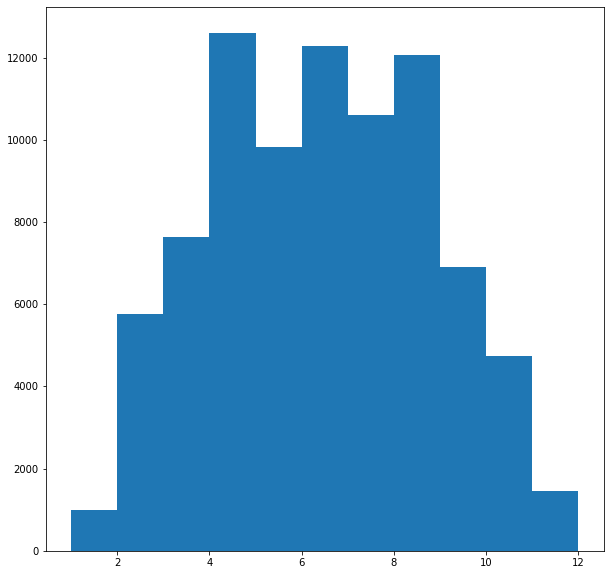

In [62]:
#Standard distribution plot of the ProsperScore variable
bin_edges = np.arange(1, df['ProsperScore'].max()+2,1)
plt.figure(figsize=(10,10))
plt.hist(data = df, x='ProsperScore', bins=bin_edges);

ProsperScore seems to have a normal distribution, with most of the values falling in the 4-8 range.

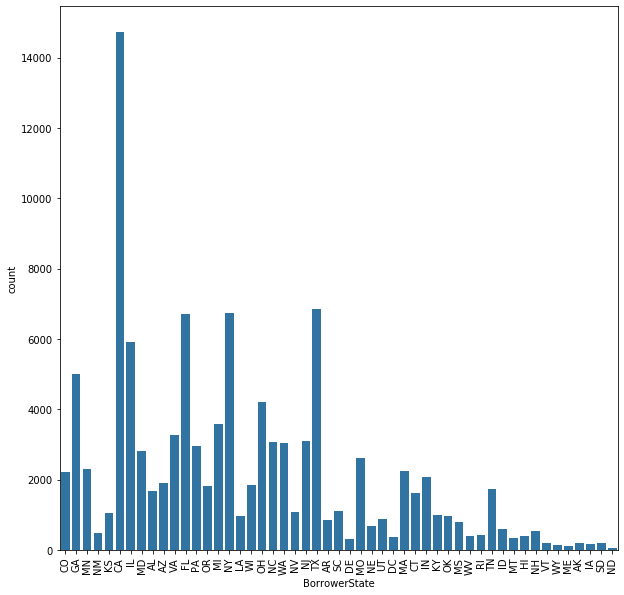

In [63]:
#Standard count plot of loans per borrower state
base_colour=sns.color_palette()[0]
plt.figure(figsize=(10,10))
sns.countplot(data = df, x='BorrowerState', color=base_colour)
plt.xticks(rotation=90);

CA seems to be the state with the largest amount of loans offered by far, going over 14,000 loans altogether, more than double than the 2nd state has - TX with a little over 6,000 loans.

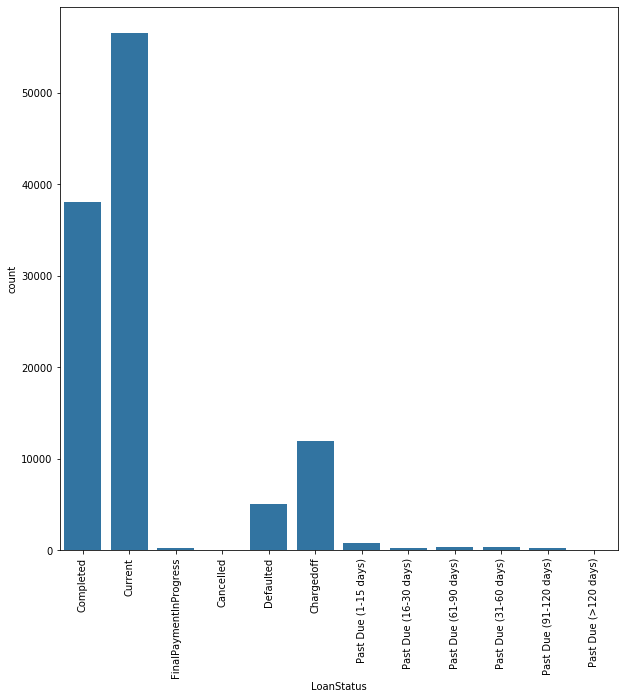

In [64]:
#Standard count plot of loans per loan status
plt.figure(figsize=(10,10))
sns.countplot(data = df, x='LoanStatus', color=base_colour)
plt.xticks(rotation=90);

A considerable amount of loans have been either completed (~40,000) or are currently ongoing (>55,000) while the number of defaulted and charged off are making up for around 15,000. There is a negligible amount of past date loans compared to the total numbers. 

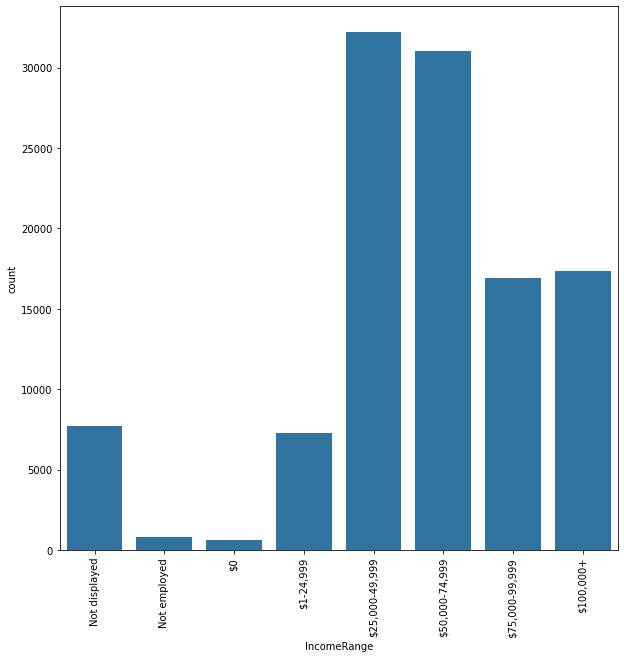

In [65]:
#Standard count plot of loans per income range
plt.figure(figsize=(10, 10))
sns.countplot(data = df, x = 'IncomeRange',color=base_colour)
plt.xlabel('IncomeRange')
plt.xticks(rotation=90);

When taking a look at the `IncomeRange` categorical variable we can notice that a majority of loans were given out to customers that fall in the 25,000 - 49,999 and 50,000 - 74,999 ranges (over 60,000 loans). The next 2 ranges - 75,000 - 99,999 and +100,000 make up for another ~30,000 loans.

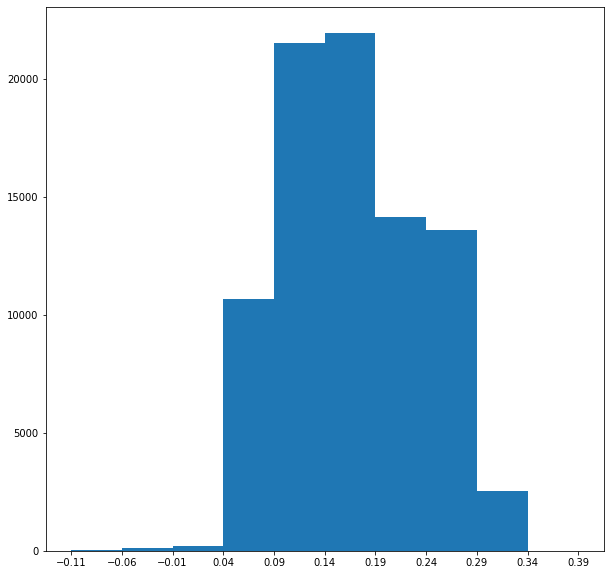

In [66]:
#Standard distribution plot of the EstimatedEffectiveYield variable
bin_edges = np.arange(-0.11, df['EstimatedEffectiveYield'].max()+0.1,0.05)
plt.figure(figsize=(10,10))
plt.hist(data = df, x='EstimatedEffectiveYield', bins=bin_edges)
plt.xticks(bin_edges);

The `EstimatedEffectiveYield` seems to have a unimodal normal distribution with a majority of values falling between 0.1 and 0.2. But how do these compare to the `EstimatedLoss` and `EstimatedReturn` distributions? How would the distributions look on a more granular scale?

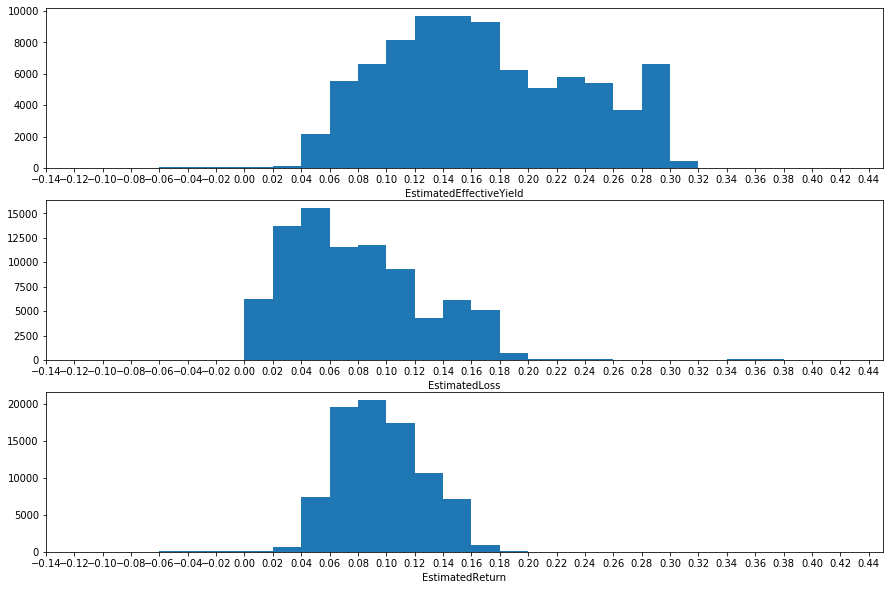

In [67]:
#Distribution plots for the EstimatedEffectiveYield, EstimatedLoss and EstimatedReturn variables on a more granular scale
fig, ax = plt.subplots(nrows=3, figsize = [15,10])

variables = ['EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(-0.5, 0.5, 0.02)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel(var)
    ax[i].set_xticks(bins)
    ax[i].set_xlim(-0.14,0.45)
    
plt.show()

When zooming in at a more granular level we can observe that the `EstimatedEffectiveYield` distribution looks roughly bimodal, with a larger peak between 0.10 and 0.18 values and a smaller peak between the 0.28 and 0.30 values. A longer tail can also be observed for a few negative values ranging from -0.06 to to 0.04 values, which can potentially be considered outliers.
The `EstimatedLoss` distribution looks unimodal, with a larger peak between the 0.02 and 0.06 value range and a smaller one between the 0.14 and 0.18 value range. This time the tail is longer on the positive side , with the 0.20 - 0.26 and 0.34 and 0.38 ranges displaying values outside the bulk of the distribution.
Finally, the `EstimatedReturn` distribution looks unimodal, similar to the plot generated above, although we can see some  values in the -0.06 - 0.02 range falling outside the bulk of the distribution.

In [68]:
# select low outliers for EstimatedReturns, using criteria found in the plots above
pd.set_option("display.max_rows", 100)
low_outliers = (df['EstimatedReturn'] < 0.02)
low_outliers.sum()
df.loc[low_outliers,:]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
501,089C348555489823736377D,460749,37:25.0,NaN,36,Chargedoff,11/01/2013 00:00,0.24807,0.2100,0.2000,-0.0013,0.190,-0.0013,1.0,HR,5.0,7,OK,Sales - Commission,Full-time,26.0,False,False,NaN,30/05/2010 18:37,600.0,619.0,25/09/2000 00:00,6.0,5.0,11.0,2,175,1.0,8.0,1.0,931.0,0.0,2.0,0.0,2866.0,0.00,0.0,6.0,0.71,1.0,0.32,"$25,000-49,999",True,2500.000000,202835903671936416AC795,1.0,23.0,23.0,0.0,0.0,1000.0,382.96,21.0,545,31.0,45,42926,1000,11/06/2010 00:00,Q2 2010,7A14340779198322168C4AC,37.68,942.00,616.92,325.08,-15.46,0.0,383.08,383.08,0.0,1.0,0,0,0.00,31
527,32543499181220496DBB555,483095,46:00.2,NaN,36,Completed,21/04/2011 00:00,0.36783,0.3269,0.3169,-0.0677,0.366,-0.0677,1.0,HR,1.0,1,CA,Professional,Employed,136.0,True,False,NaN,20/10/2010 10:44,660.0,679.0,28/09/1997 00:00,17.0,15.0,53.0,7,250,5.0,14.0,0.0,0.0,0.0,0.0,0.0,7359.0,0.89,673.0,51.0,0.96,3.0,0.31,"$50,000-74,999",True,5916.666667,8E46360324954060391A06D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,40,45490,1500,23/11/2010 00:00,Q4 2010,1639349868498136403371F,65.91,1693.37,1500.00,193.37,-5.91,0.0,0.00,0.00,0.0,1.0,0,1,1058.77,27
760,4685347195009875809A70E,440607,46:53.8,NaN,36,Completed,28/02/2011 00:00,0.22491,0.2000,0.1900,-0.0006,0.180,-0.0006,1.0,HR,5.0,1,AK,Professional,Full-time,15.0,True,False,NaN,01/01/2010 14:42,680.0,699.0,07/06/1994 00:00,7.0,7.0,16.0,3,168,4.0,21.0,0.0,0.0,0.0,0.0,0.0,5890.0,0.98,110.0,13.0,1.00,1.0,0.04,"$75,000-99,999",True,6250.000000,9A9035786327334736D1DF2,1.0,20.0,20.0,0.0,0.0,5000.0,0.00,79.0,0,NaN,50,40452,1500,20/01/2010 00:00,Q1 2010,BDB43372286754816086581,55.75,1787.14,1500.00,287.14,-14.35,0.0,0.00,0.00,0.0,1.0,0,0,0.00,75
1064,35983541133056379F4AA5F,568108,00:22.2,NaN,12,Completed,13/04/2013 00:00,0.13696,0.0608,0.0508,0.0508,0.033,0.0178,6.0,A,10.0,3,CA,Computer Programmer,Employed,32.0,False,False,NaN,13/03/2012 11:00,760.0,779.0,03/07/2001 00:00,5.0,5.0,9.0,4,89,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2695.0,0.07,35305.0,9.0,1.00,0.0,0.09,"$75,000-99,999",True,6250.000000,6CAE3648874158279D0C4AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,23,63573,2000,13/04/2012 00:00,Q2 2012,803B35419418658088BE93F,0.00,2066.62,2000.00,66.62,-10.95,0.0,0.00,0.00,0.0,1.0,0,0,0.00,17
1321,6DD034810270651087DFB9F,452658,10:40.3,NaN,36,Completed,29/04/2011 00:00,0.36336,0.3390,0.3290,-0.0354,0.345,-0.0354,1.0,HR,1.0,3,FL,Accountant/CPA,Self-employed,99.0,False,False,NaN,30/03/2010 09:4

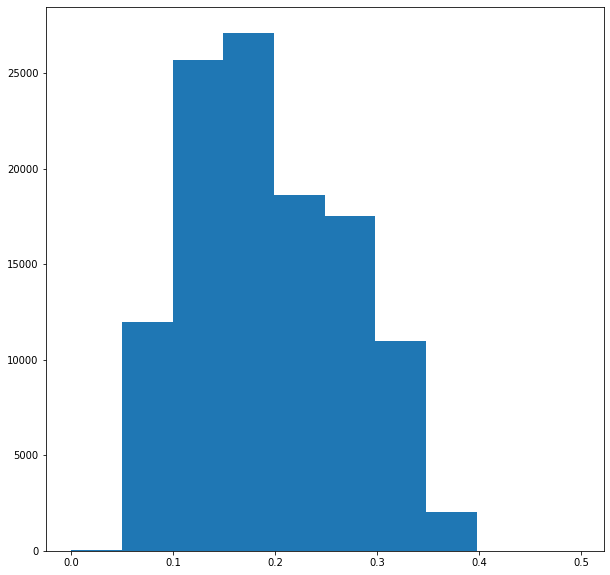

In [69]:
#Standard distribution plot of the Borrower Rate variable
plt.figure(figsize=(10,10))
plt.hist(data = df, x='BorrowerRate');

The `BorrowerRate` distribution seems unimodal with a peak for values in the 0.1-0.2 range.

### Distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The `ProsperScore` and `BorrowerRate` variables have normal unimodal distributions while the `EstimatedEffectiveYield`, `EstimatedLoss` and `EstimatedReturn` variables have been analyzed on more granular scales to check for outliers and unusual distribution shapes. The `EstimatedEffectiveYield` and `EstimatedLoss` seem to have bimodal distributions under the new scales. All 3 variables seem to have outliers as specified above.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Upon closer inspection of the `EstimatedReturn` outliers, we have concluded that these are actually valid data points and seem to correlate across all 3 variables in question (`EstimatedEffectiveYield` and `EstimatedReturn` outliers are roughly in a positive correlation, the `EstimatedLoss` outliers seem to have a negative correlation with the other 2 variable outliers). Since other fields in the data seem to have valid values, we have decided to keep these for any further analysis conducted.

## Bivariate Exploration

In the first part of the exploration for bivariates, we will take a look at all the corellations betweeen the numerical variables we are interested in:

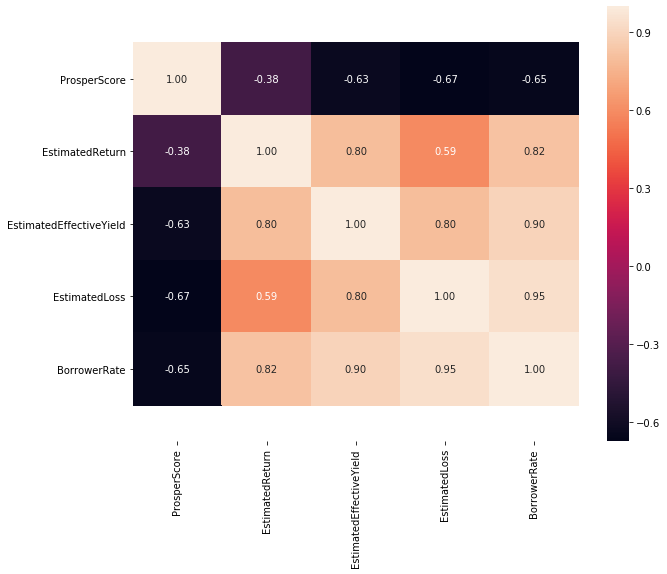

In [70]:
# correlation plot
interest_vars = ['ProsperScore','EstimatedReturn', 'EstimatedEffectiveYield', 'EstimatedLoss', 'BorrowerRate']

plt.figure(figsize = [10, 8])
sns.heatmap(df[interest_vars].corr(), annot = True, fmt = '.2f')
plt.ylim(len(interest_vars)+0.5, -0.5);

Some interesting findings here: 

- The corellation coefficient for the `ProsperScore` and `EstimatedReturn` variables seems to indicate a weak negative corellation, meaning that the risk score of a loan does not really change based on changes effected to the estimated return. We would have expected that the corellation between the 2 variables to be stronger as high risk loans typically would account for higher estimated returns.
- The rest of the numerical variables - `EstimatedEffectiveYield`, `EstimatedLoss` and `BorrowerRate` show a moderate to high negative corellation in relation to the `ProsperScore` variable which is to be expected.
- The rest of the variables excluding `ProsperScore`seem to have a moderate to strong positive corellation between themselves.

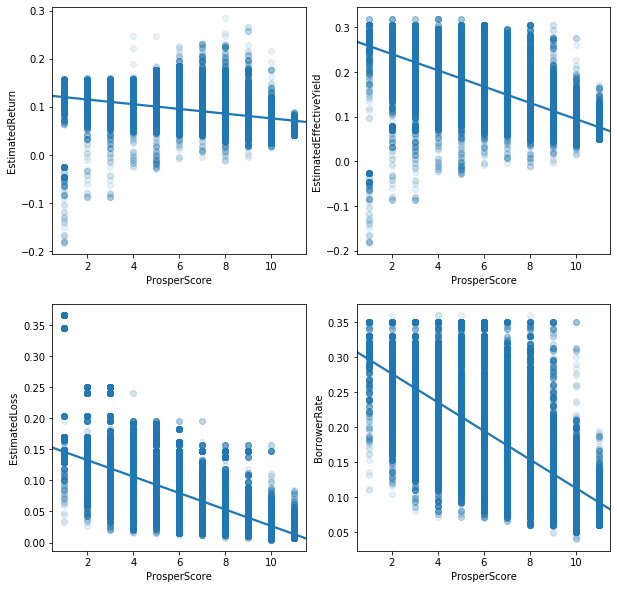

In [71]:
#Corellation plots - ProsperScore vs EstimatedReturn, EstimatedEffectiveYield, EstimatedLoss and BorrowerRate
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.regplot(data = df, x='ProsperScore', y='EstimatedReturn', scatter_kws={'alpha':0.1})
plt.subplot(2, 2, 2)
sns.regplot(data = df, x='ProsperScore', y='EstimatedEffectiveYield', scatter_kws={'alpha':0.1})
plt.subplot(2, 2, 3)
sns.regplot(data = df, x='ProsperScore', y='EstimatedLoss', scatter_kws={'alpha':0.1})
plt.subplot(2, 2, 4)
sns.regplot(data = df, x='ProsperScore', y='BorrowerRate', scatter_kws={'alpha':0.1})

In order to visualize the relationships better, we have plotted the `ProsperScore` variable against all the other numerical variables of interest.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

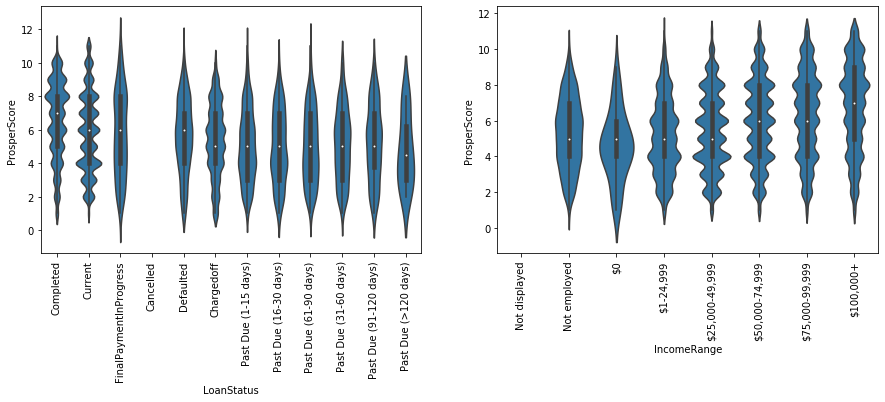

In [72]:
#Violin plots for ProsperScore vs LoanStatus and IncomeRange
plt.figure(figsize = [15, 10])

plt.subplot(2, 2, 1)
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x = 'LoanStatus', y = 'ProsperScore', color = base_color)
plt.xticks(rotation=90)


plt.subplot(2, 2, 2)
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x = 'IncomeRange', y = 'ProsperScore', color = base_color)
plt.xticks(rotation=90)

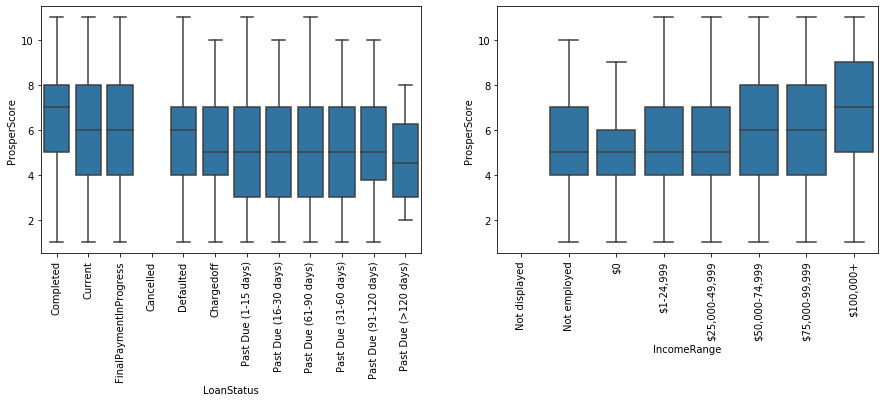

In [74]:
#Box plots for ProsperScore vs LoanStatus and IncomeRange
plt.figure(figsize = [15, 10])

plt.subplot(2, 2, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'LoanStatus', y = 'ProsperScore', color = base_color)
plt.xticks(rotation=90)


plt.subplot(2, 2, 2)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'IncomeRange', y = 'ProsperScore', color = base_color)
plt.xticks(rotation=90);

When exploring the relationship between the `ProsperScore` vs `LoanStatus` and `IncomeRange` categorial variables, we could observe that the 2nd choice for boxplots makes for a much clearer picture. Here are the findings:

- The distribution of the `ProsperScore` ratings is concentrated betweeen 5 and 8 for Completed loans and between 4 and 8 for Current and FinalPaymentInProgress ones. The values for the interquartile ranges seem to decrease for Defaulted to Past Due loans although not by much, with most Past Due loans in the 3 to 7 ProsperScore range. This is indicative that loans that are not completed or in progress do tend to have a lower ProsperScore, meaning they are more risky.
- The distribution of the `ProsperScore` ratings is concentrated betweeen 4 and 8 for the majority of the IncomeRange brackets. As seen in the boxplot on the right, the distributions interquartile ranges of the risk score increase on the higher income brackets. This indicates that the higher the income the higher the less risky a loan is deemed.

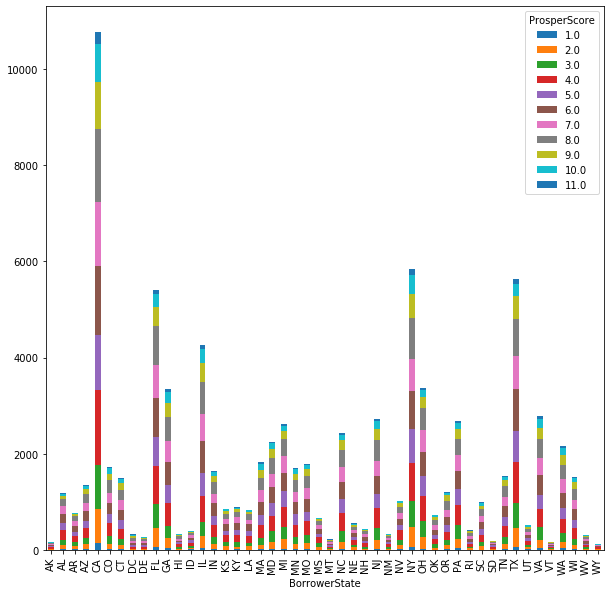

In [75]:
#Barplot for ProsperScore by BorrowerState
df_plot = df.groupby(['ProsperScore', 'BorrowerState']).size().reset_index().pivot(columns='ProsperScore', index='BorrowerState', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(10,10));

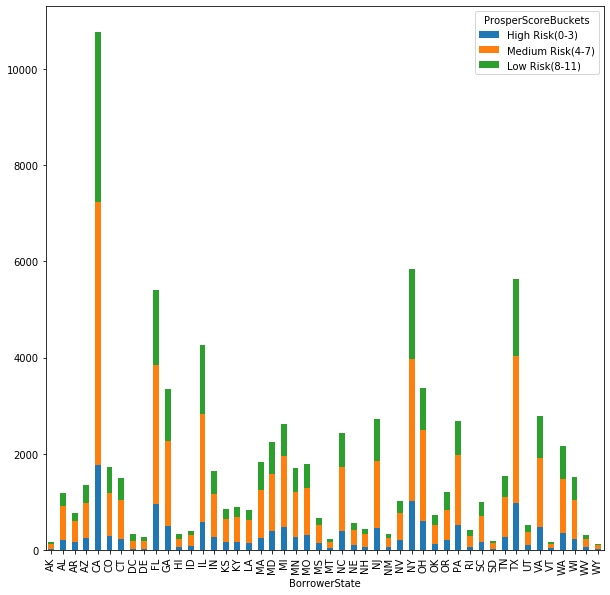

In [77]:
#Barplot for ProsperScoreBuckets by BorrowerState
bin_edges = [0,3,7,11]
bin_names = ['High Risk(0-3)','Medium Risk(4-7)','Low Risk(8-11)']
df['ProsperScoreBuckets'] = pd.cut(df['ProsperScore'], bin_edges, labels=bin_names)
df_plot = df.groupby(['ProsperScoreBuckets', 'BorrowerState']).size().reset_index().pivot(columns='ProsperScoreBuckets', index='BorrowerState', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(10,10));

Finally, looking at the `ProsperScore` distribution at the state level, we can observe that the 2nd plot offers a much clearer insight when the risk scores are bucketed into larger groups. Overall it does seem that the majority of the loans are deemed either medium or low risk with no unusual patterns in distribution for any of the states. It seems that Prosper takes a rather cautious and evenly distributed approach with the amount of risk they want to take on their loans.

### Relationships observed in the bivariate analysis summary

Price had a surprisingly high amount of correlation with the diamond size, even before transforming the features. An approximately linear relationship was observed when price was plotted on a log scale and carat was plotted with a cube-root transform. The scatterplot that came out of this also suggested that there was an upper bound on the diamond prices available in the dataset, since the range of prices for the largest diamonds was much narrower than would have been expected, based on the price ranges of smaller diamonds.

`EstimatedEffectiveYield`, `EstimatedLoss` and `BorrowerRate` all showed moderative to high negative corellation in relation to the `ProsperScore` variable, hinting that the lower the risk of a loan the lower the values for the other 3 variables in cause.  Surprisingly the corellation between `EstimatedReturn` and `ProsperScore` is a weak negative one as described above. These relationships have been depicted in both a heatmap but also in separate scatter plots for a better understanding of the distribution of datat points. 

As for the categorical variables - loans that have a status of Completed, Current or FinalPaymentInProgress for the `LoanStatus` attribute seem to have a lower risk while others that are Defaulted or PastDue seem to have a higher risk. Nothing surprising for the `IncomeRange` variable either when paired with `ProsperScore` - the higher the income, the lower the risk of the loan. Finally, when looking at `BorrowerState` it seems that most loans are either low or medium risk and all risk buckets seem to have a roughly even distribution for all of the states.

### Relationships between the other features (not the main feature(s) of interest)

`EstimatedEffectiveYield`, `EstimatedLoss`, `EstimatedReturn` and `BorrowerRate` all seem to show moderate to high positive corellations but as these relationships are not of interest for our analysis we will not continue investigating further.


## Multivariate Exploration

In the next section we will take a closer look at how `BorrowerRate`, `EstimatedReturn` and `IncomeRange` all interact together with the `ProsperScore` variable.

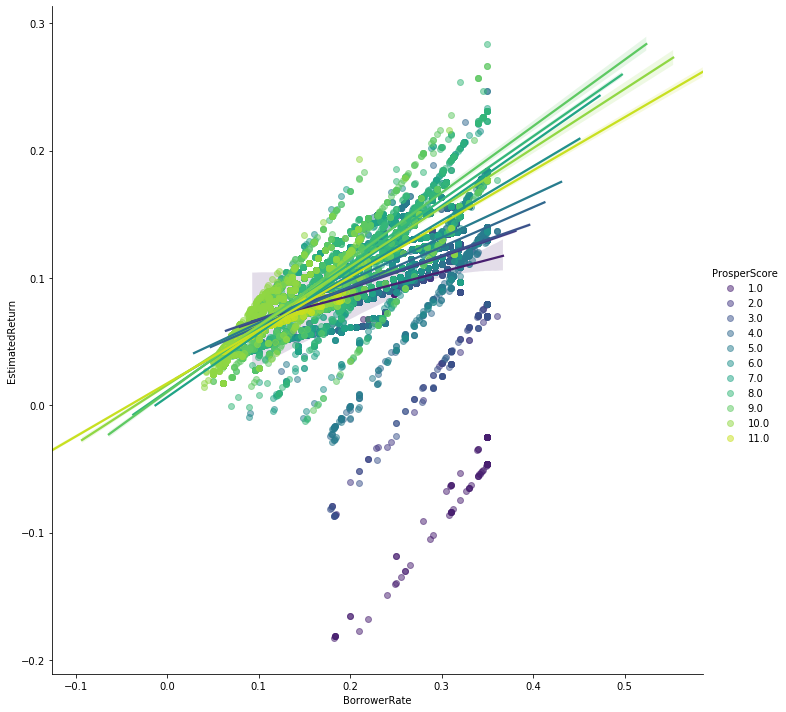

In [78]:
#Scatter plot for BorrowerRate vs EstimatedReturn by ProsperScore
g = sns.FacetGrid(data = df, hue = 'ProsperScore', height=10, palette = 'viridis')
g.map(sns.regplot, 'BorrowerRate', 'EstimatedReturn', scatter_kws={'alpha':0.5})
g.add_legend()

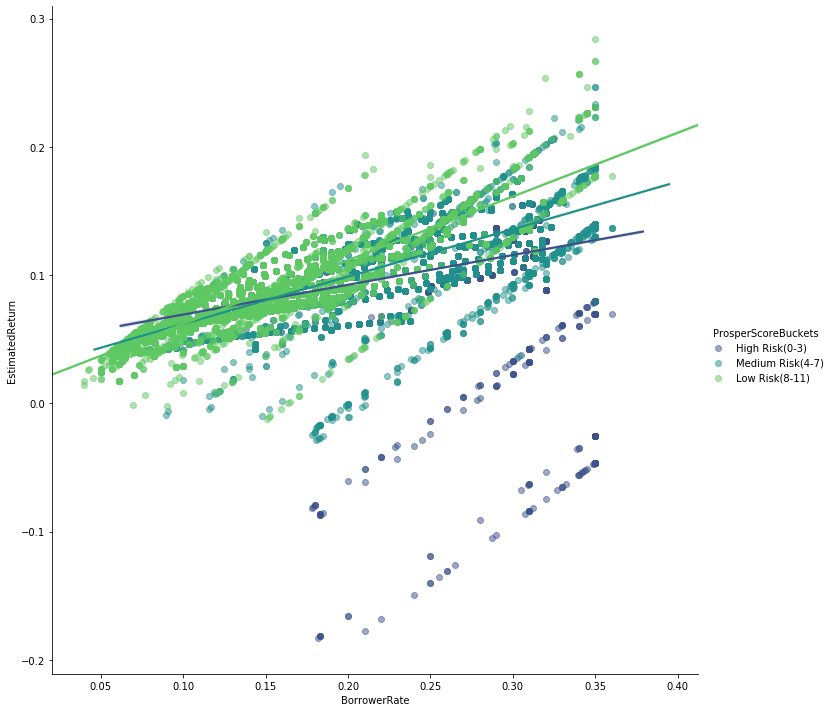

In [88]:
#Scatter plot for BorrowerRate vs EstimatedReturn by ProsperScoreBuckets
g = sns.FacetGrid(data = df, hue = 'ProsperScoreBuckets', height=10, palette = 'viridis')
g.map(sns.regplot, 'BorrowerRate', 'EstimatedReturn', scatter_kws={'alpha':0.5})
g.add_legend();

When looking at the relationship between `EstimatedReturn` and `BorrowerRate` at each `ProsperScore` score, it seems pretty obvious that using the ProsperScore buckets we have used earlier seem to work better here and provide a much clearer picture. While the correlation between the first 2 variables seem stronger the Low Risk loans, we would like to take a more in depth look to clarify the matter.

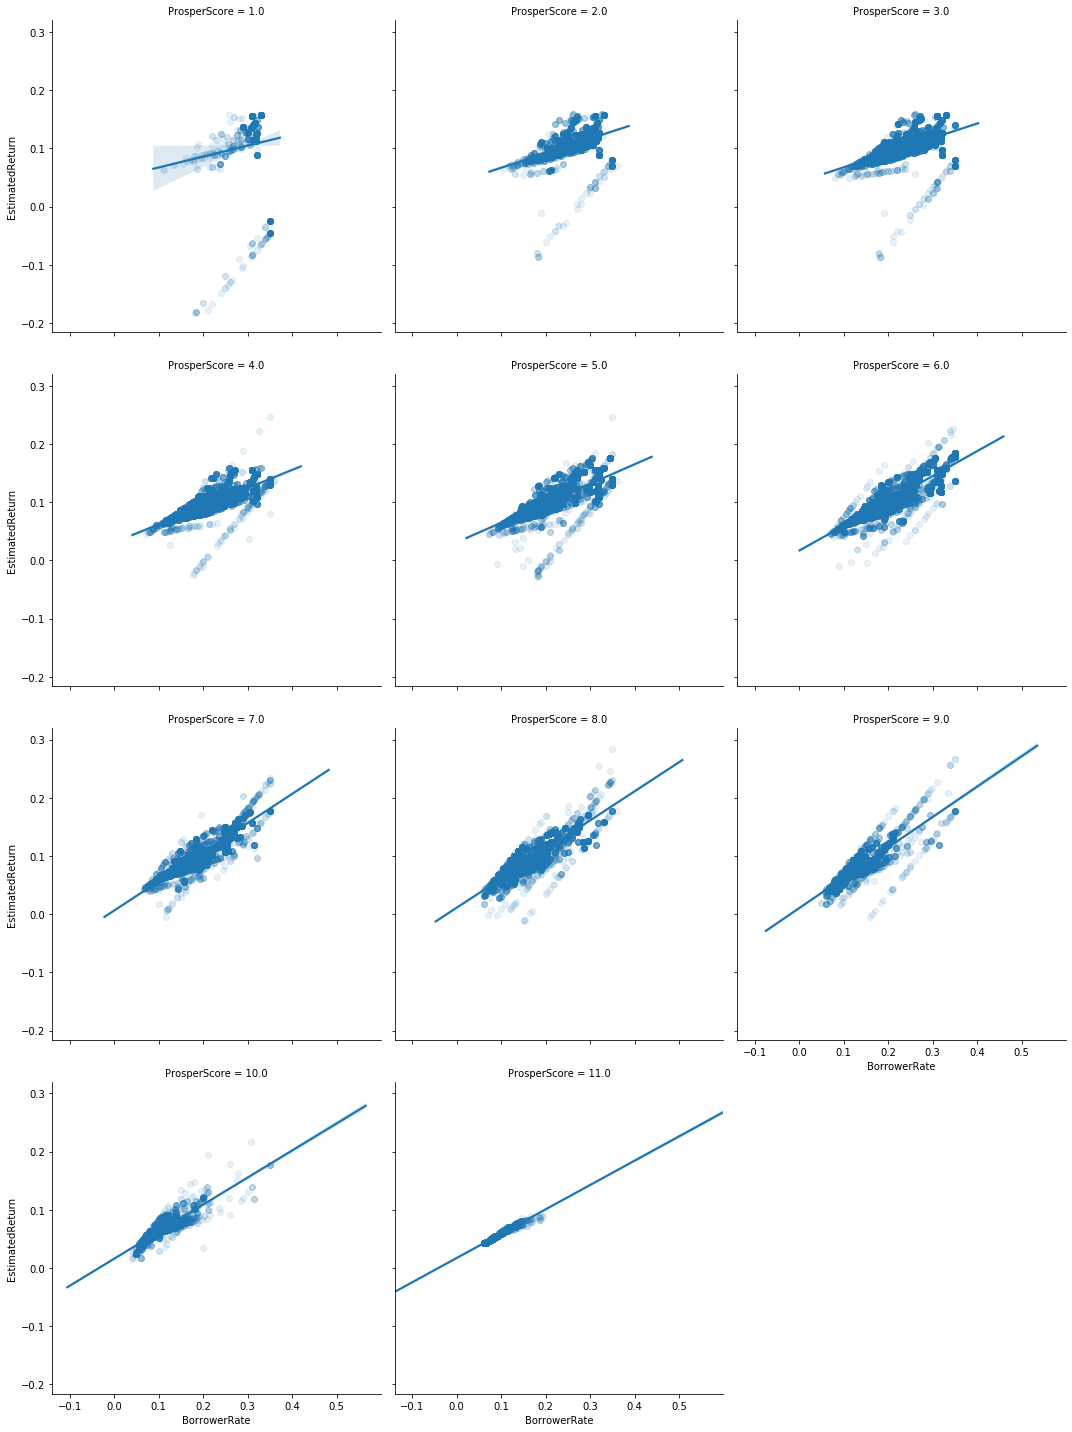

In [80]:
#Scatter plots for BorrowerRate vs EstimatedReturn by individual ProsperScore
g= sns.FacetGrid(data=df, col='ProsperScore', col_wrap=3, size=5)
g.map(sns.regplot, 'BorrowerRate','EstimatedReturn', scatter_kws={'alpha':0.1});

As assumed above, it does seem that a higher positive corellation is present between the `EstimatedReturn` and `BorrowerRate`, especially when the `ProsperScore` values goes between 7 and 11.

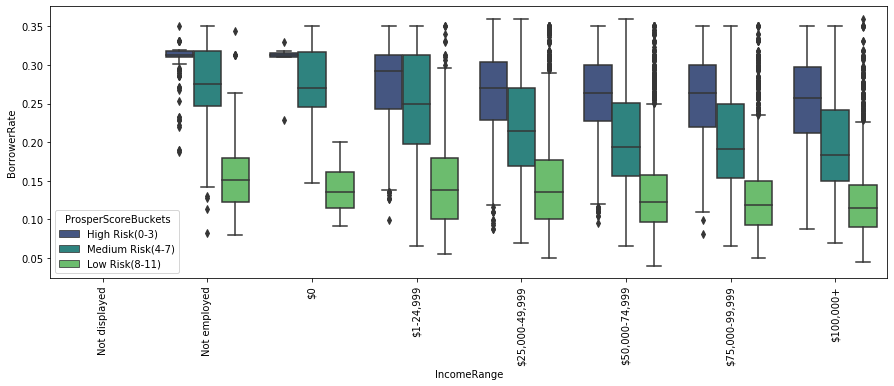

In [86]:
#Box plot for BorrowerRate by IncomeRange and ProsperScoreBuckets
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'IncomeRange', y = 'BorrowerRate', hue = 'ProsperScoreBuckets', palette='viridis')
plt.xticks(rotation=90);

The last item investigated here is the distribution of `BorrowerRate` values for different `IncomeRange` brackets based on the `ProsperScore`. As observed in the graph above the `BorrowerRate` values for high risk loans seem to have an inconsistent distribution for income ranges labelled as Not employed or 0. This may be due to a lower amount of high risk loans being offered for these groups as it would increase the chance of a default. The next bracket - 1-24,999\$ seems to have the widest interquartile distribution for medium risk loans, meaning that the borrower rate has more flexibility here. The distribution for the next income range brackets seem to be surprisingly even for all the `ProsperScore` buckets.

### Relationships observed in the multivariate analysis summary

As described above, the corellation between `BorrowerRate` and `EstimatedReturn` variables is gradually more stronger in a positive direction as the `ProsperScore` goes up. This means that low risk loans with a high borrower rate translate into higher estimated returns. 

As for the insights regarding `BorrowerRate` based on `IncomeRange` and `ProsperScore`, the distributions seem uneven between the income ranges labelled as Not employed and 0 and the ones labelled 1-24,999 and above, with fewer data points and an uneven distribution for high risk loans for these.

### Were there any interesting or surprising interactions between features?

All plots seem to hint towards plausible assumptions with no particular surprising findings.